In [1]:
%run Product_Revenue.ipynb

 ········
 ········


In [2]:
import pandas as pd
import numpy as np
from numpy import unique
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from datetime import datetime, date, timedelta
import calendar

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [7]:
from sklearn.cluster import DBSCAN

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import FeatureAgglomeration
from sklearn.metrics import pairwise_distances

In [34]:
from sklearn import metrics
from sklearn.metrics import silhouette_score


In [10]:
def plot_results(cluster_data):
    fig1, (axes) = plt.subplots(1,2,figsize=(12,5))
    scat_1 = sns.scatterplot('orderQuantity', 'productrevenue', data=cluster_data, hue='Cluster_Id', ax=axes[0], palette='Set1', legend='full')

    sns.scatterplot('price', 'productrevenue', data=cluster_data,hue='Cluster_Id', palette='Set1', ax=axes[1], legend='full')

    axes[0].scatter(cluster_data.cluster_centers_[:,1],cluster_data.cluster_centers_[:,2], marker='s', s=40, c="blue")
    axes[1].scatter(cluster_data.cluster_centers_[:,0],cluster_data.cluster_centers_[:,2], marker='s', s=40, c="blue")
    plt.show()

# Data Preparation

# ATU

In [11]:
prepare_data_atu = prepare_data_by_product(items_w_products_atu, date(2010,1,1), date(2019,12,31))
prepare_data_atu = prepare_data_atu.drop(['product_id'], axis=1)
prepare_data_atu.head(2)

,orderQuantity,price,productrevenue
productNumber,,,
0,66,4663.23,9047.72
1,8,851.29,851.29


# LOTT

In [12]:
prepare_data_lott = prepare_data_by_product(items_w_products_lott, date(2010,1,1), date(2019,12,31))
prepare_data_lott = prepare_data_lott.drop(['product_id'], axis=1)
prepare_data_lott.head(2)

,orderQuantity,price,productrevenue
productNumber,,,
0,2,46.49,92.98
1,5,69.05,69.05


# Clustering of Products

## K Means

### Elbow Plot

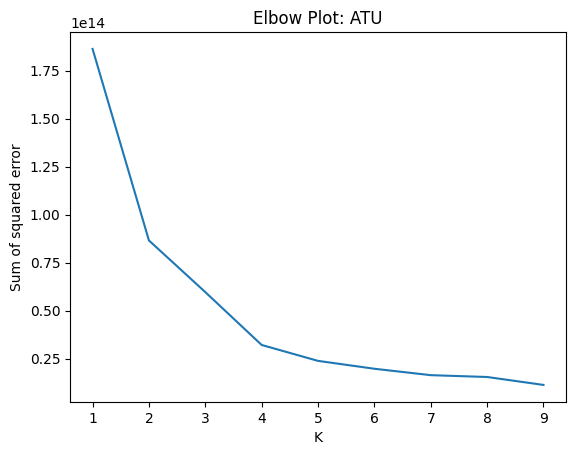

In [107]:
## ATU
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(prepare_data_atu)
    sse.append(km.inertia_)


plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow Plot: ATU')
plt.plot(k_rng,sse)

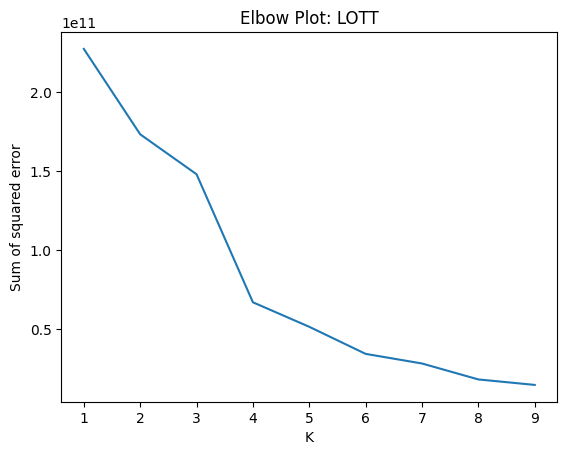

In [108]:
## LOTT
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(prepare_data_lott)
    sse.append(km.inertia_)


plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.title('Elbow Plot: LOTT')
plt.plot(k_rng,sse)

### ATU

In [15]:
prod_data_kmeans = prepare_data_atu.copy()

In [16]:
kmeans = KMeans(n_clusters=4, max_iter=150, random_state= 50)
kmeans_labels = kmeans.fit(prod_data_kmeans)
kmeans_pred = kmeans.predict(prod_data_kmeans)

In [17]:
kmeans_labels = prod_data_kmeans.copy()
kmeans_labels.loc[:,'Cluster'] = kmeans.labels_

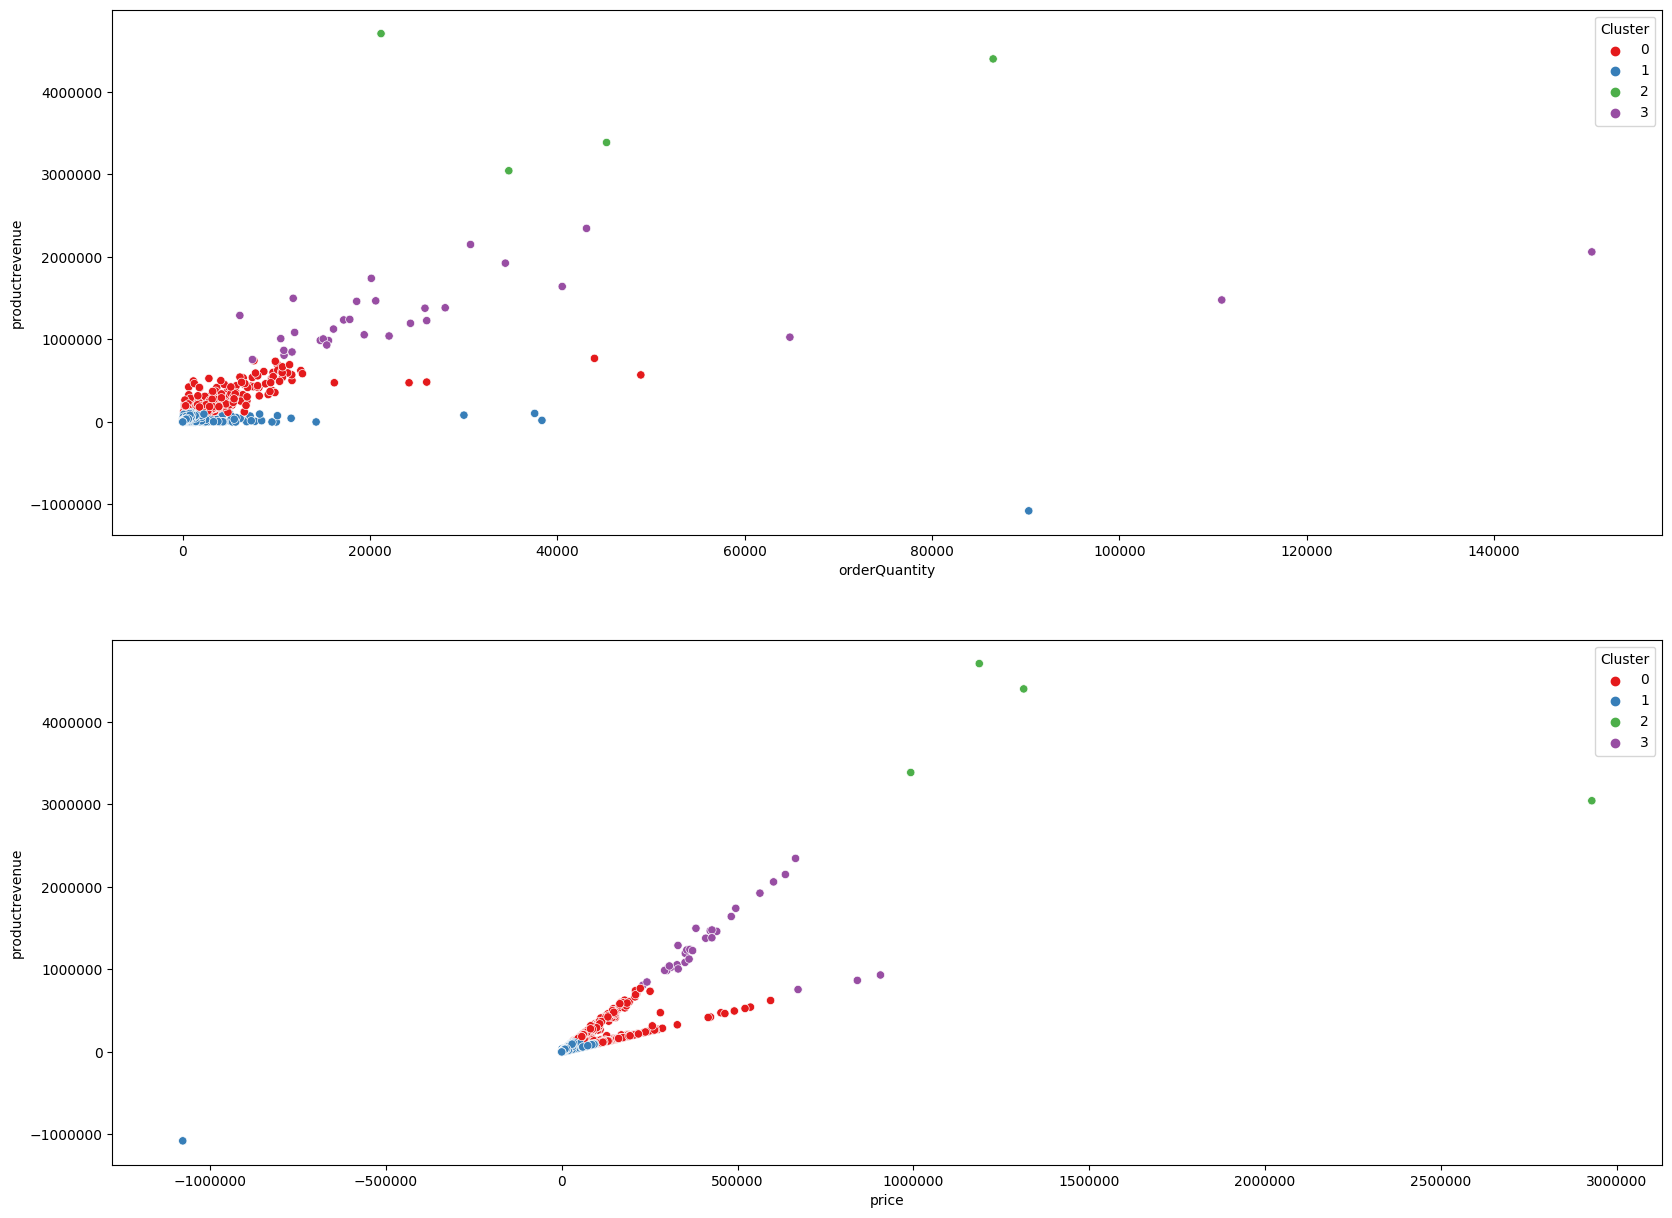

In [18]:
fig1 = plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
sns.scatterplot(x = 'orderQuantity', y = 'productrevenue', data=kmeans_labels, hue='Cluster', palette='Set1', legend='full')
plt.ticklabel_format(style='plain')
plt.subplot(2,1,2)
sns.scatterplot(x = 'price', y = 'productrevenue', data=kmeans_labels,hue='Cluster', palette='Set1', legend='full')
plt.ticklabel_format(style='plain')
#axes[0].scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], marker='s', s=40, c="blue")
#axes[1].scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

### LOTT

In [19]:
prod_lott_data_kmeans = prepare_data_lott.copy()

In [95]:
kmeans_lott = KMeans(n_clusters=4, max_iter=150, random_state= 50)
kmeans_lott_labels = kmeans_lott.fit(prod_lott_data_kmeans)
kmeans_lott_pred = kmeans_lott.predict(prod_lott_data_kmeans)

In [101]:
kmeans_lott = KMeans(n_clusters=6, max_iter=150, random_state= 50)
kmeans_lott_labels = kmeans_lott.fit(prod_lott_data_kmeans)
kmeans_lott_pred = kmeans_lott.predict(prod_lott_data_kmeans)

In [102]:
kmeans_lott_labels = prod_lott_data_kmeans.copy()
kmeans_lott_labels.loc[:,'Cluster'] = kmeans_lott.labels_

## k = 4

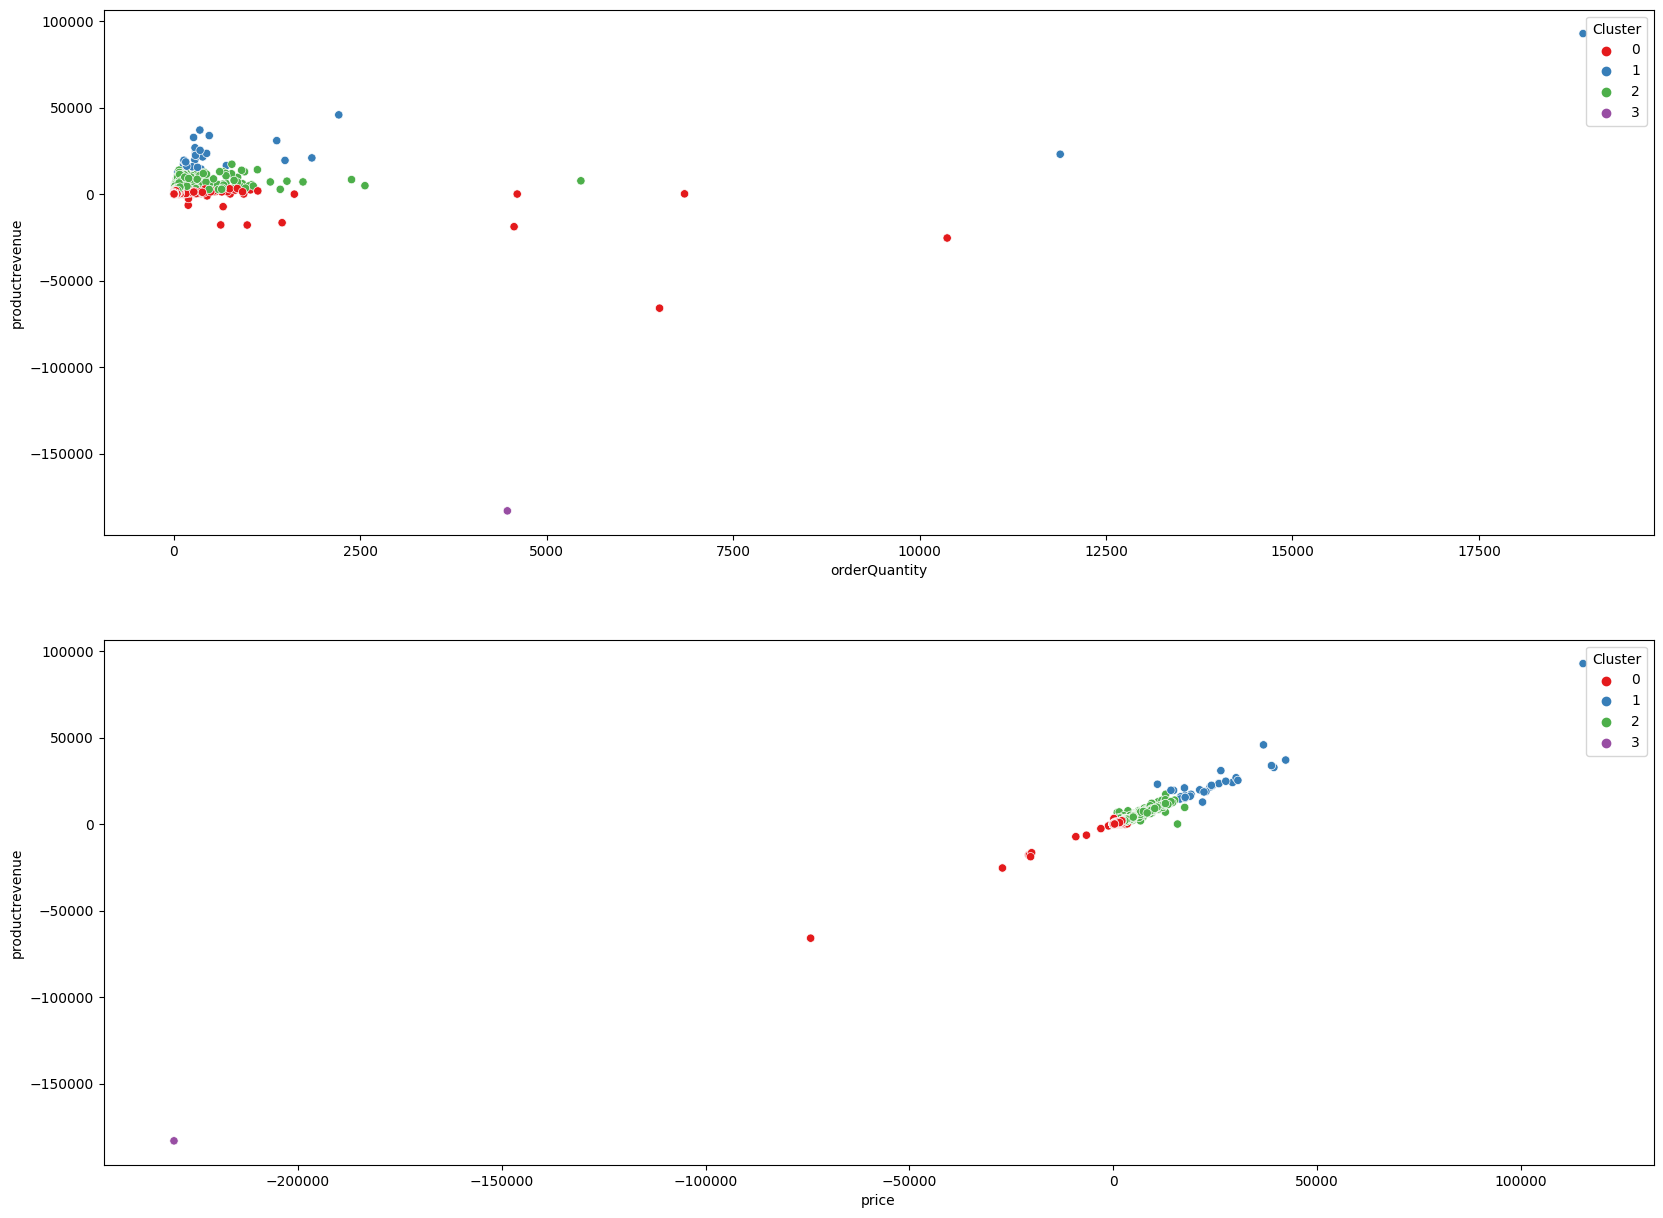

In [97]:
fig1 = plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
sns.scatterplot(x = 'orderQuantity', y = 'productrevenue', data=kmeans_lott_labels, hue='Cluster', palette='Set1', legend='full')
plt.ticklabel_format(style='plain')
plt.subplot(2,1,2)
sns.scatterplot(x = 'price', y = 'productrevenue', data=kmeans_lott_labels,hue='Cluster', palette='Set1', legend='full')
plt.ticklabel_format(style='plain')
#axes[0].scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], marker='s', s=40, c="blue")
#axes[1].scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

## k = 6

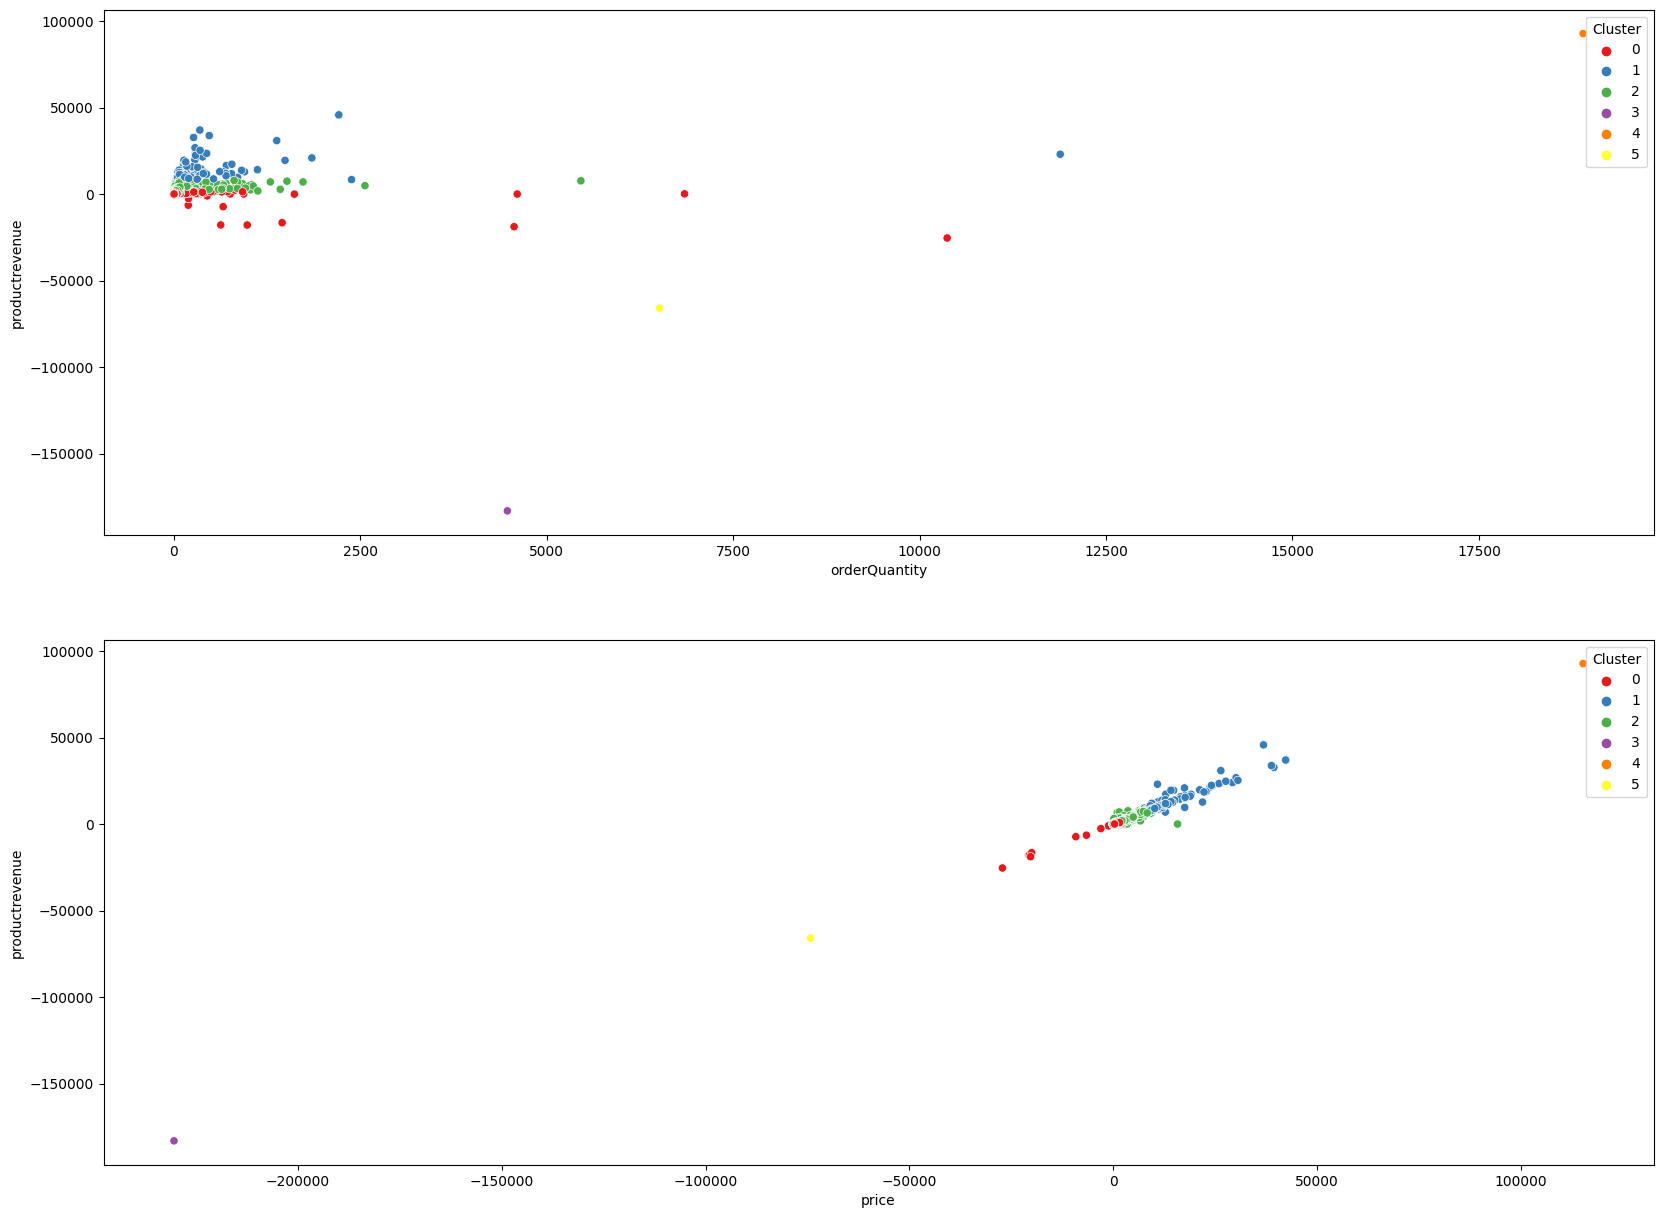

In [94]:
fig1 = plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
sns.scatterplot(x = 'orderQuantity', y = 'productrevenue', data=kmeans_lott_labels, hue='Cluster', palette='Set1', legend='full')
plt.ticklabel_format(style='plain')
plt.subplot(2,1,2)
sns.scatterplot(x = 'price', y = 'productrevenue', data=kmeans_lott_labels,hue='Cluster', palette='Set1', legend='full')
plt.ticklabel_format(style='plain')
#axes[0].scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], marker='s', s=40, c="blue")
#axes[1].scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

## DBSCAN

### ATU

In [23]:
prod_data_dbscan = prepare_data_atu.copy()

In [24]:
DBS_clustering = DBSCAN(eps=180, min_samples=20).fit(prod_data_dbscan)

DBSCAN_clustered = prod_data_dbscan.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ 
dbscan_labels = DBS_clustering.labels_

In [25]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,7330
0,67286
1,30
2,26
3,93
4,36
5,89


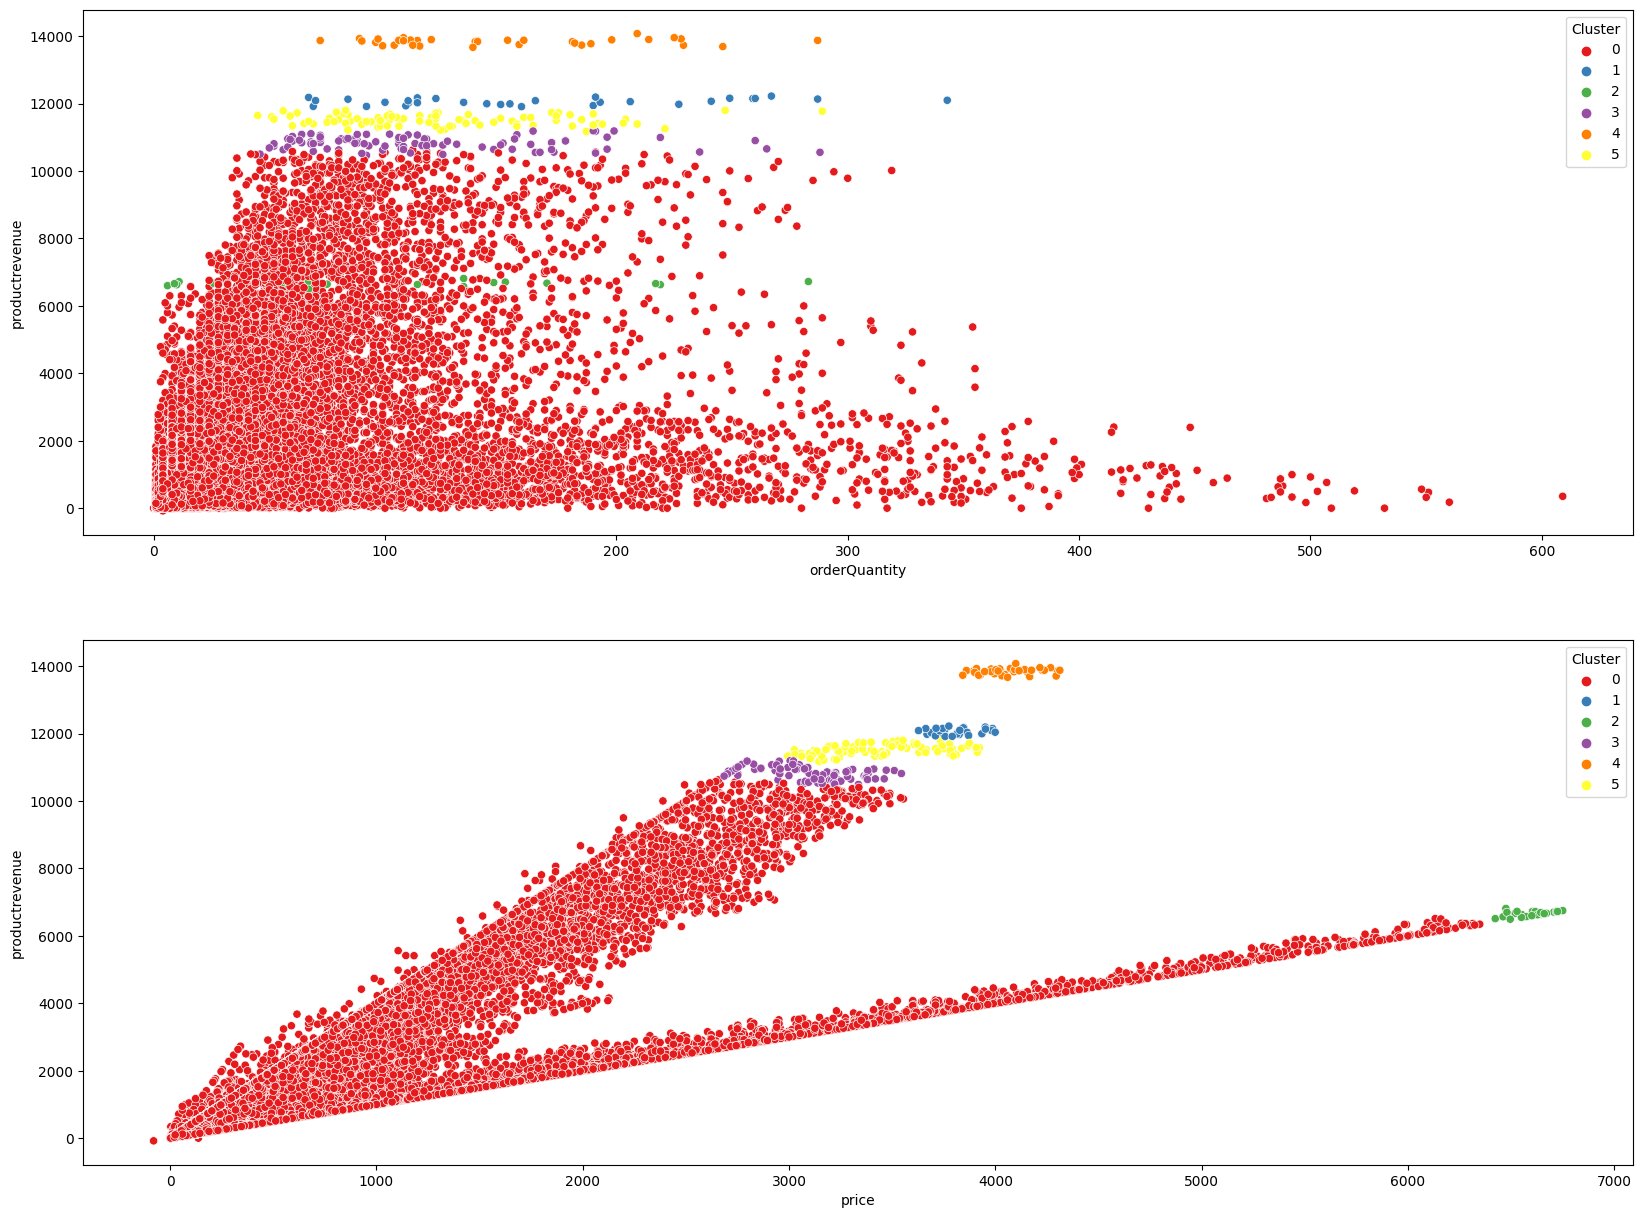

In [26]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]
fig2 = plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
sns.scatterplot(x = 'orderQuantity', y = 'productrevenue', data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1], hue='Cluster', palette='Set1', legend='full')
plt.ticklabel_format(style='plain')
plt.subplot(2,1,2)
sns.scatterplot(x = 'price', y = 'productrevenue', data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],hue='Cluster', palette='Set1', legend='full')
plt.ticklabel_format(style='plain')
#axes[0].scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], marker='s', s=40, c="blue")
#axes[1].scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

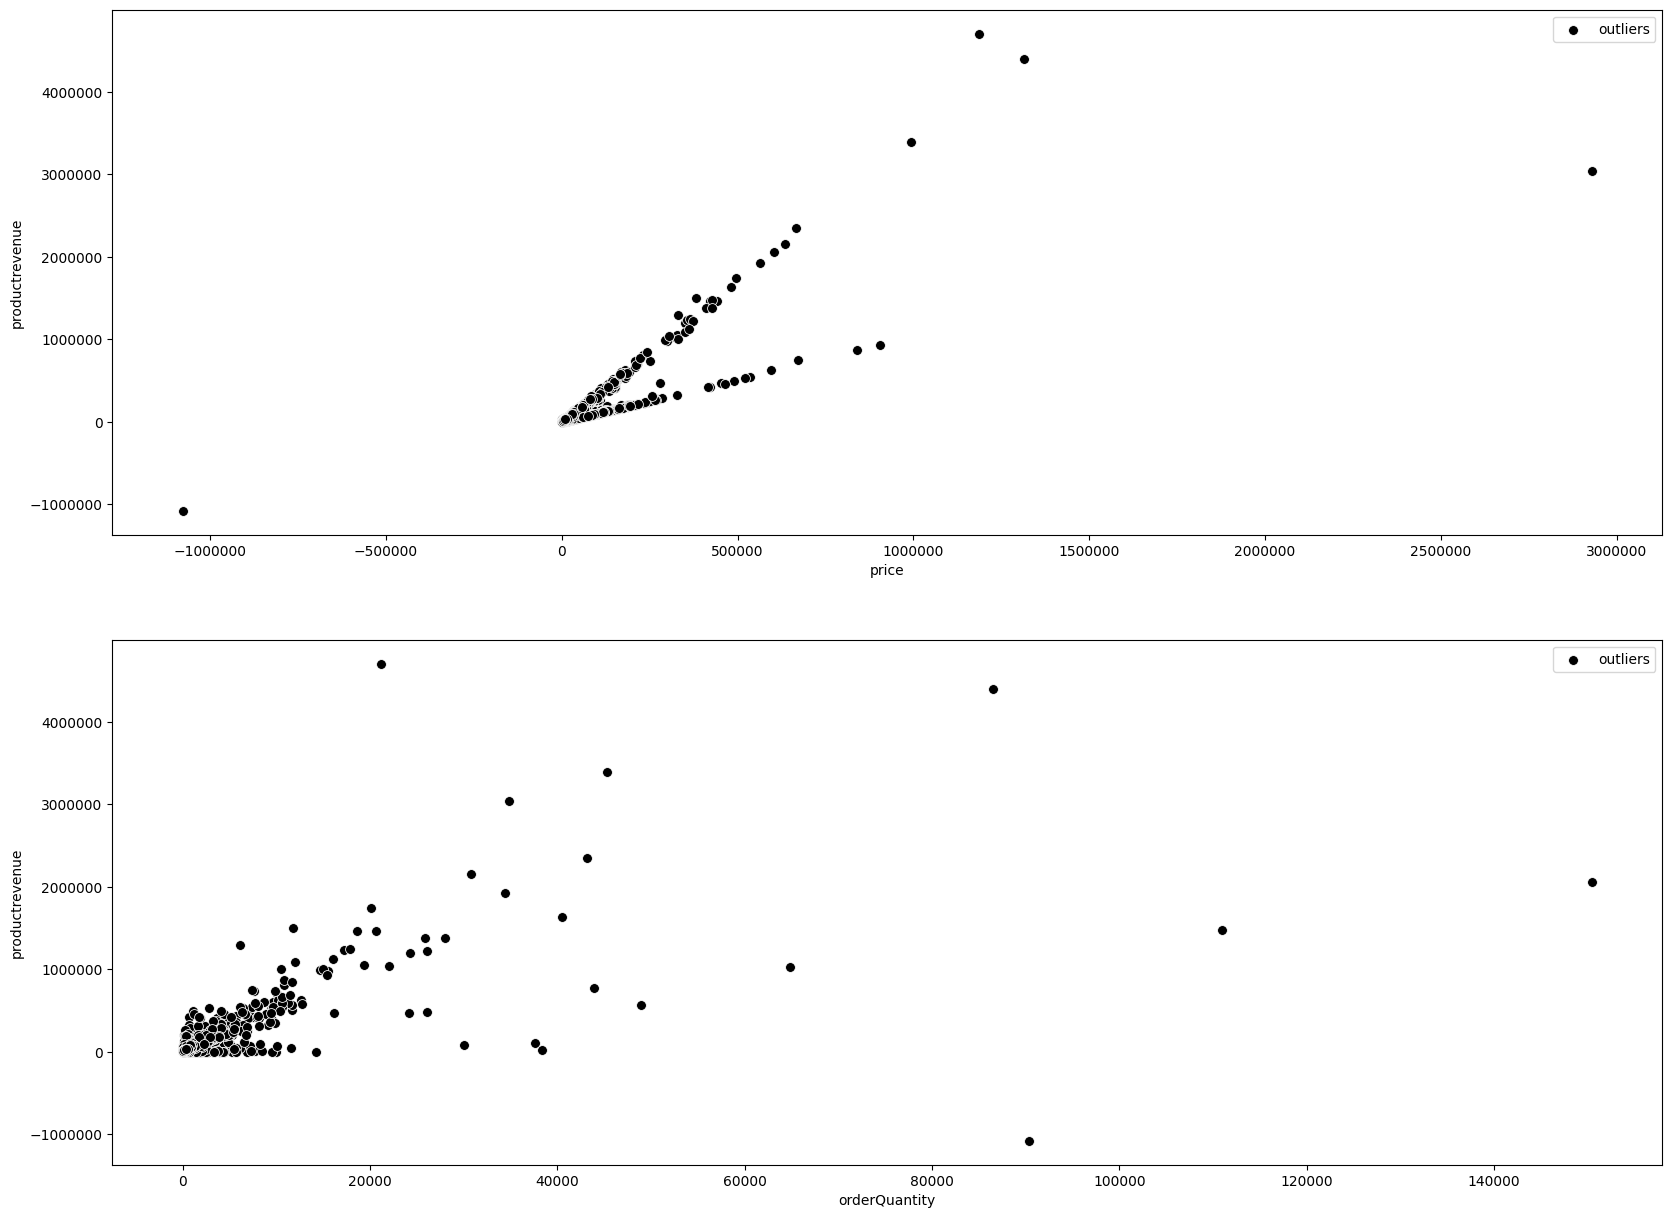

In [27]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]
fig2 = plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
sns.scatterplot(x = outliers['price'], y = outliers['productrevenue'], s=50, label='outliers', c="k")
plt.ticklabel_format(style='plain')
plt.subplot(2,1,2)
sns.scatterplot(x = outliers['orderQuantity'], y = outliers['productrevenue'], s=50, label='outliers', c="k")
plt.ticklabel_format(style='plain')
plt.show()

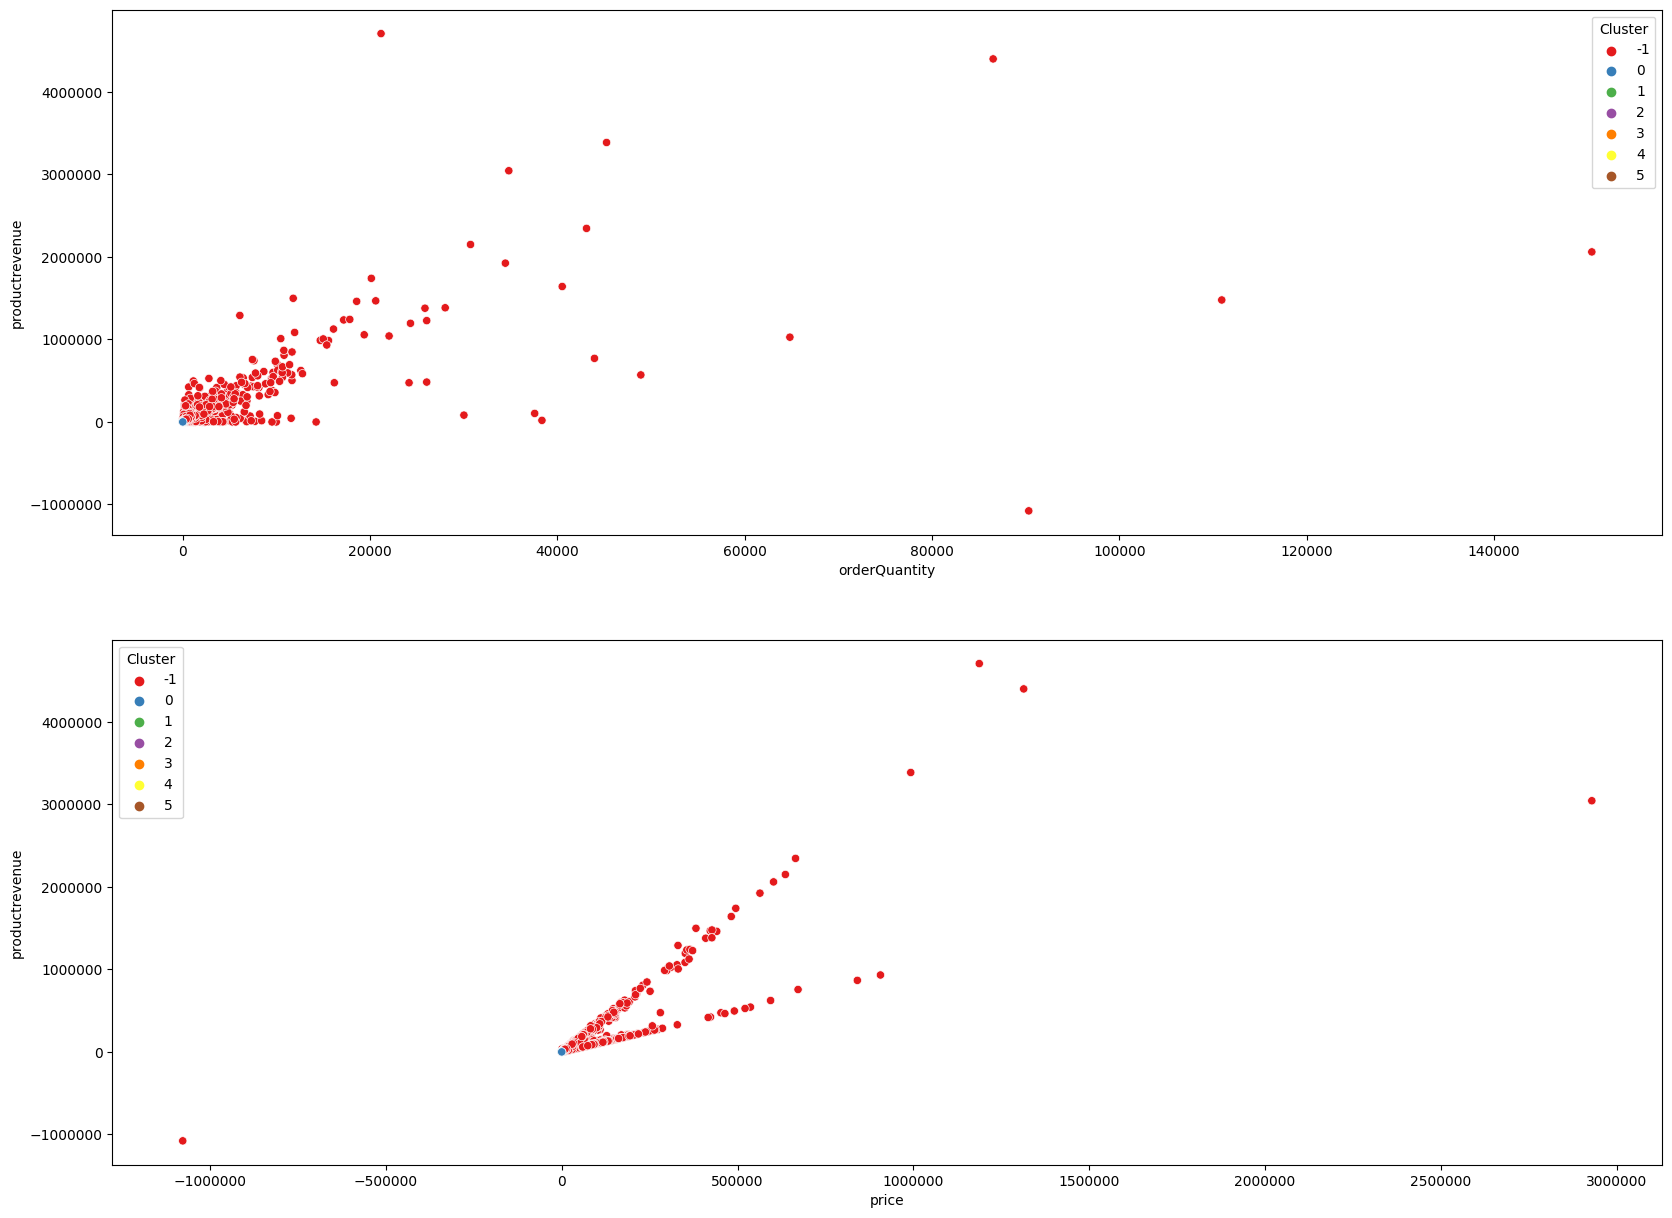

In [98]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]
fig2 = plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
sns.scatterplot(x = 'orderQuantity', y = 'productrevenue', data=DBSCAN_clustered, hue='Cluster', palette='Set1', legend='full', zorder=1)
plt.ticklabel_format(style='plain')
plt.subplot(2,1,2)
sns.scatterplot(x = 'price', y = 'productrevenue', data=DBSCAN_clustered,hue='Cluster', palette='Set1', legend='full', zorder=1)
plt.ticklabel_format(style='plain')
#axes[0].scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], marker='s', s=40, c="blue")
#axes[1].scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

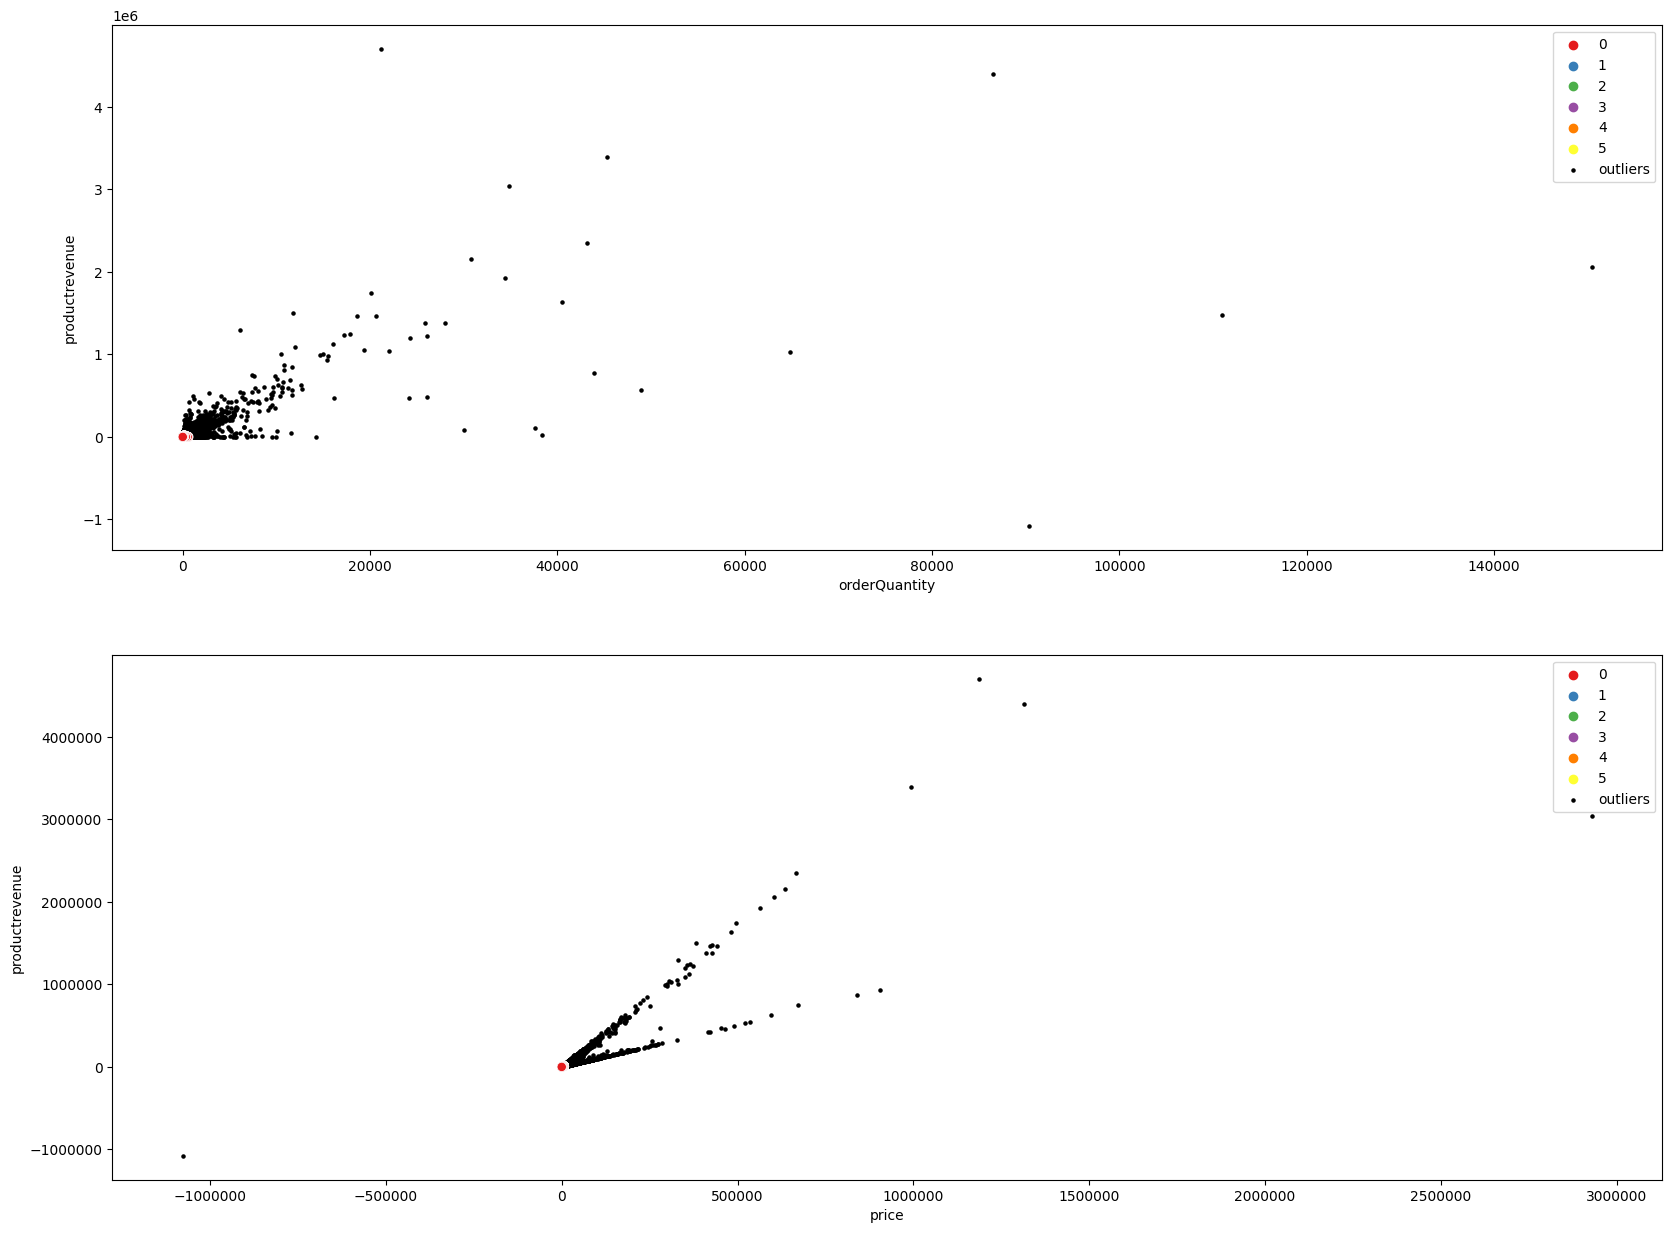

In [88]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(2,1,figsize=(20,15))
sns.scatterplot(x = 'orderQuantity', y = 'productrevenue', data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1], hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)
plt.ticklabel_format(style='plain')
sns.scatterplot(x = 'price', y = 'productrevenue', data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1], hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)
plt.ticklabel_format(style='plain')

axes[0].scatter(outliers['orderQuantity'], outliers['productrevenue'], s=5, label='outliers', c="k", zorder=-1)
axes[1].scatter(outliers['price'], outliers['productrevenue'], s=5, label='outliers', c="k", zorder=-1)
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

### LOTT

In [28]:
prod_lott_data_dbscan = prepare_data_lott.copy()

In [29]:
DBS_clustering_lott = DBSCAN(eps=70, min_samples=10).fit(prod_lott_data_dbscan)

DBSCAN_clustered_lott = prod_lott_data_dbscan.copy()
DBSCAN_clustered_lott.loc[:,'Cluster'] = DBS_clustering_lott.labels_ 
dbscan_labels_lott = DBS_clustering_lott.labels_

In [30]:
DBSCAN_clust_sizes = DBSCAN_clustered_lott.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,1449
0,162399
1,27
2,10
3,13
4,10
5,11
6,10


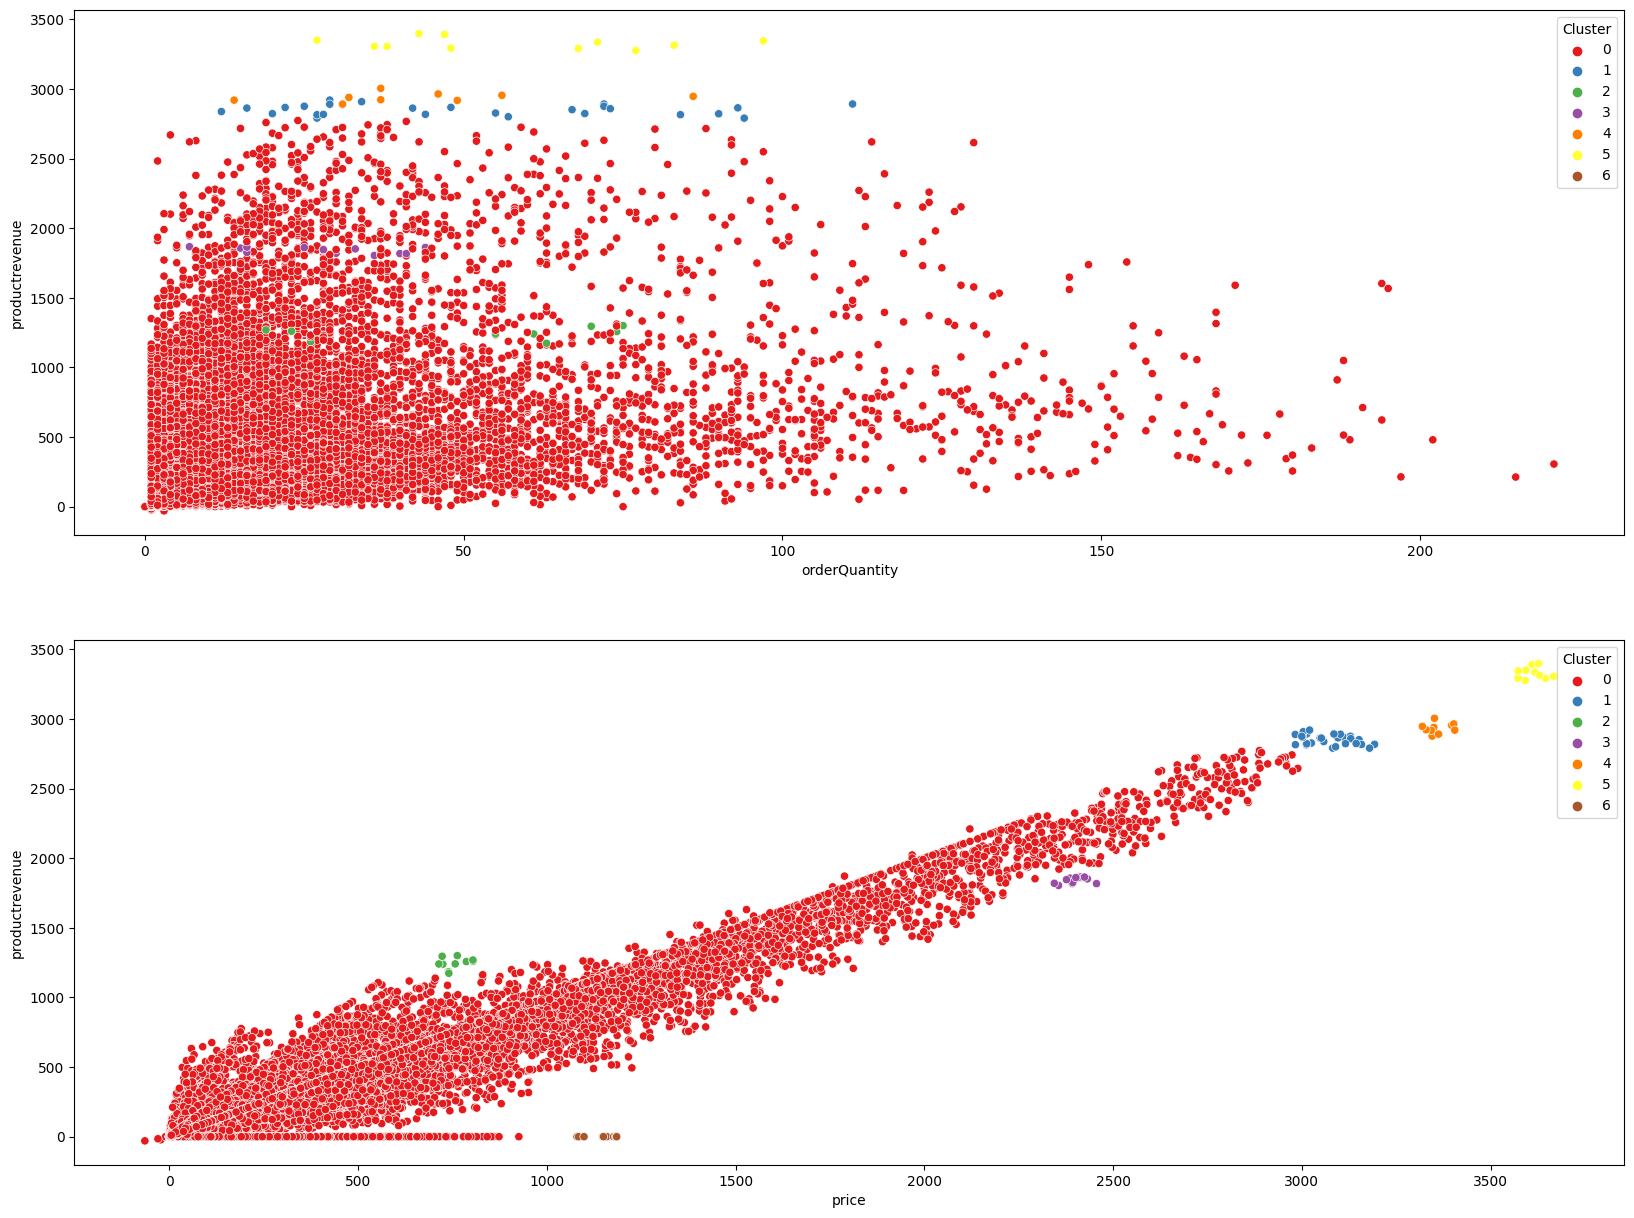

In [31]:
outliers = DBSCAN_clustered_lott[DBSCAN_clustered_lott['Cluster']==-1]
fig2 = plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
sns.scatterplot(x = 'orderQuantity', y = 'productrevenue', data=DBSCAN_clustered_lott[DBSCAN_clustered_lott['Cluster']!=-1], hue='Cluster', palette='Set1', legend='full')
plt.ticklabel_format(style='plain')
plt.subplot(2,1,2)
sns.scatterplot(x = 'price', y = 'productrevenue', data=DBSCAN_clustered_lott[DBSCAN_clustered_lott['Cluster']!=-1],hue='Cluster', palette='Set1', legend='full')
plt.ticklabel_format(style='plain')
#axes[0].scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], marker='s', s=40, c="blue")
#axes[1].scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

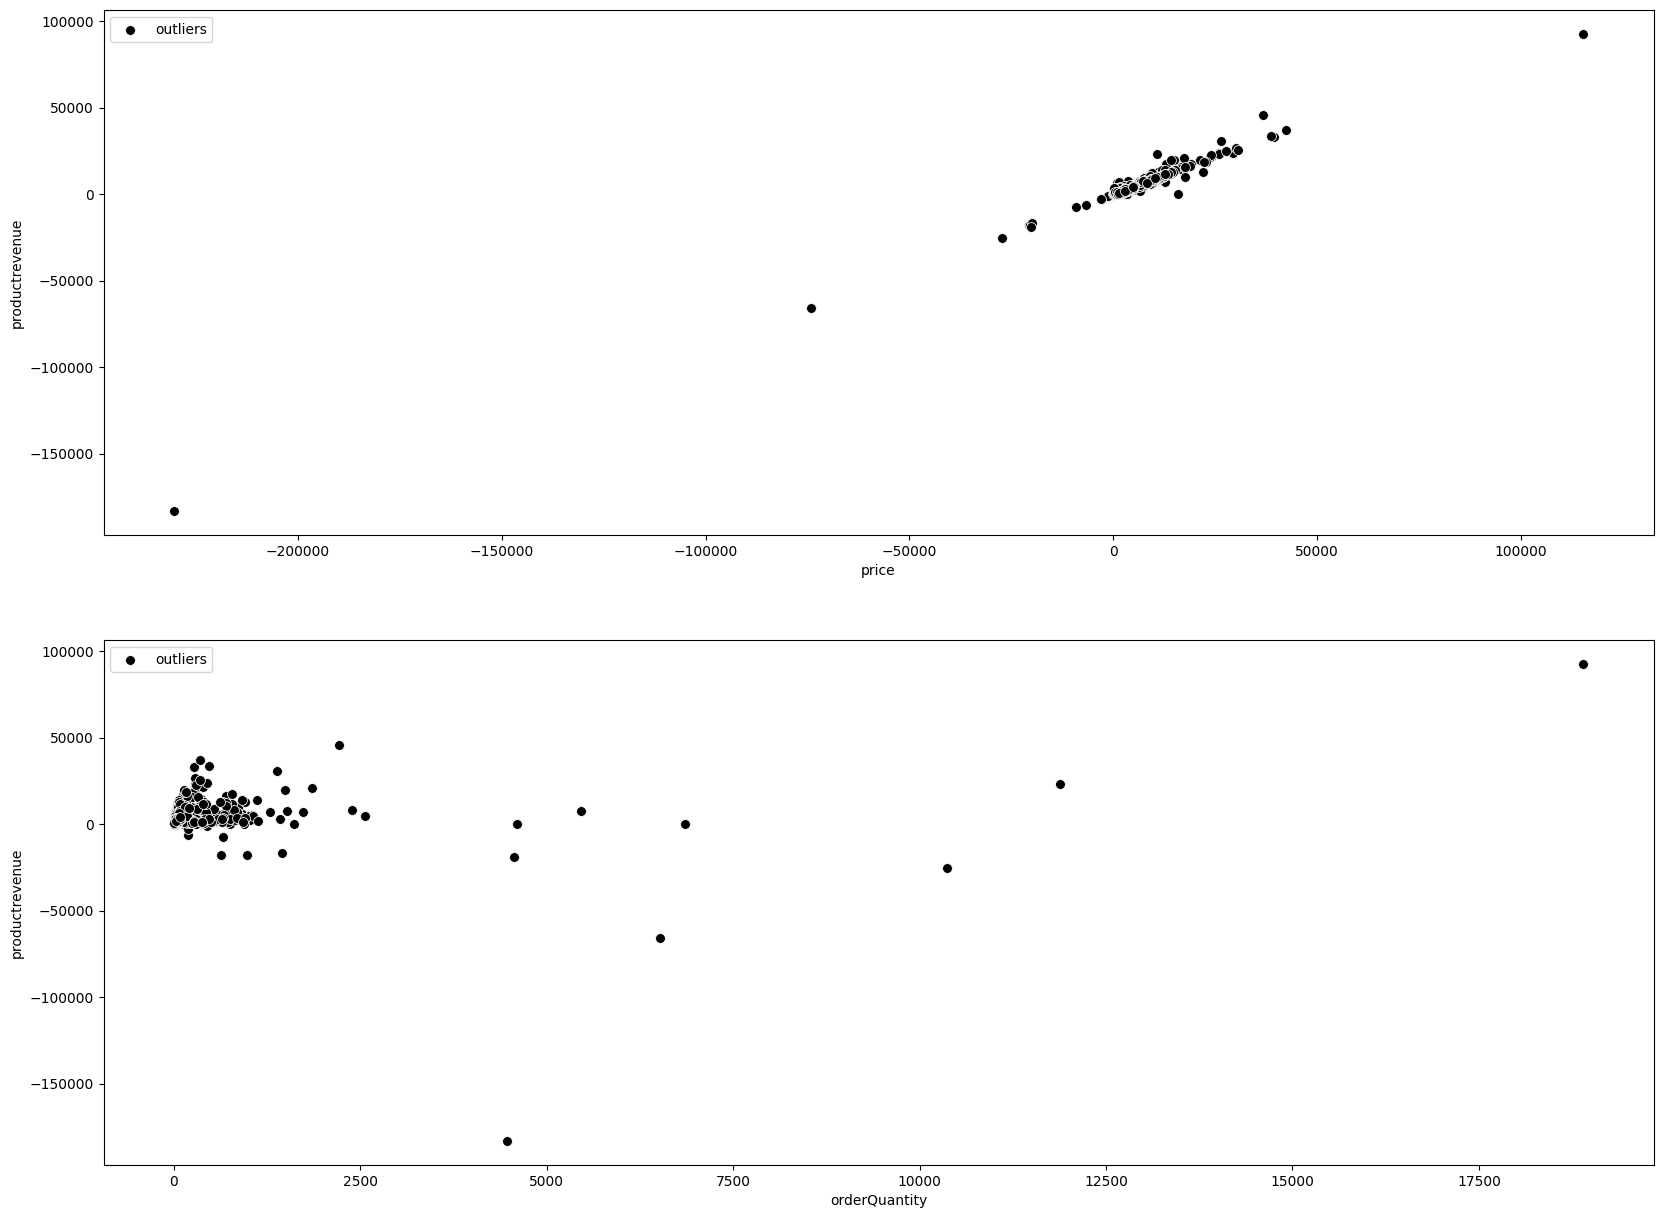

In [32]:
outliers_lott = DBSCAN_clustered_lott[DBSCAN_clustered_lott['Cluster']==-1]
fig2 = plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
sns.scatterplot(x = outliers_lott['price'], y = outliers_lott['productrevenue'], s=50, label='outliers', c="k")
plt.ticklabel_format(style='plain')
plt.subplot(2,1,2)
sns.scatterplot(x = outliers_lott['orderQuantity'], y = outliers_lott['productrevenue'], s=50, label='outliers', c="k")
plt.ticklabel_format(style='plain')
plt.show()

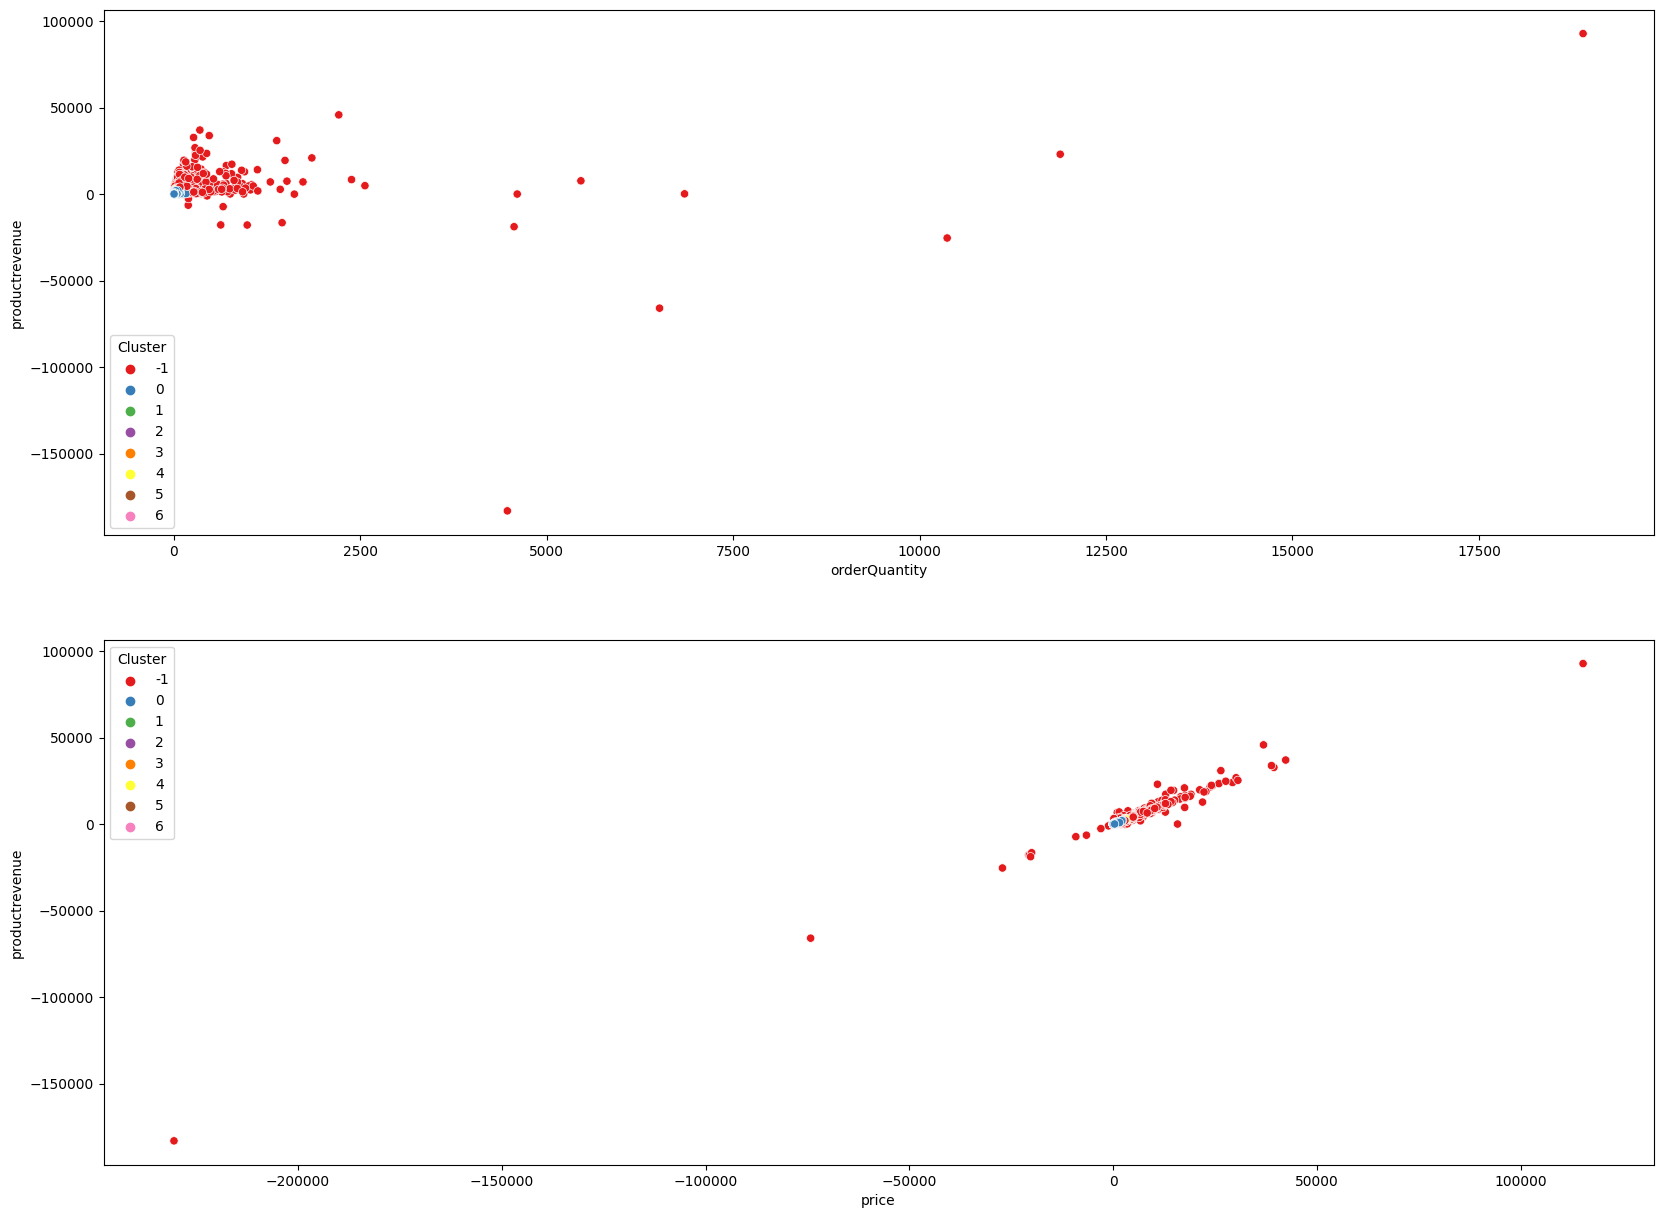

In [90]:
outliers_lott = DBSCAN_clustered_lott[DBSCAN_clustered_lott['Cluster']==-1]
fig2 = plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
sns.scatterplot(x = 'orderQuantity', y = 'productrevenue', data=DBSCAN_clustered_lott, hue='Cluster', palette='Set1', legend='full', zorder=-1)
plt.ticklabel_format(style='plain')
plt.subplot(2,1,2)
sns.scatterplot(x = 'price', y = 'productrevenue', data=DBSCAN_clustered_lott,hue='Cluster', palette='Set1', legend='full', zorder=-1)
plt.ticklabel_format(style='plain')
plt.show()

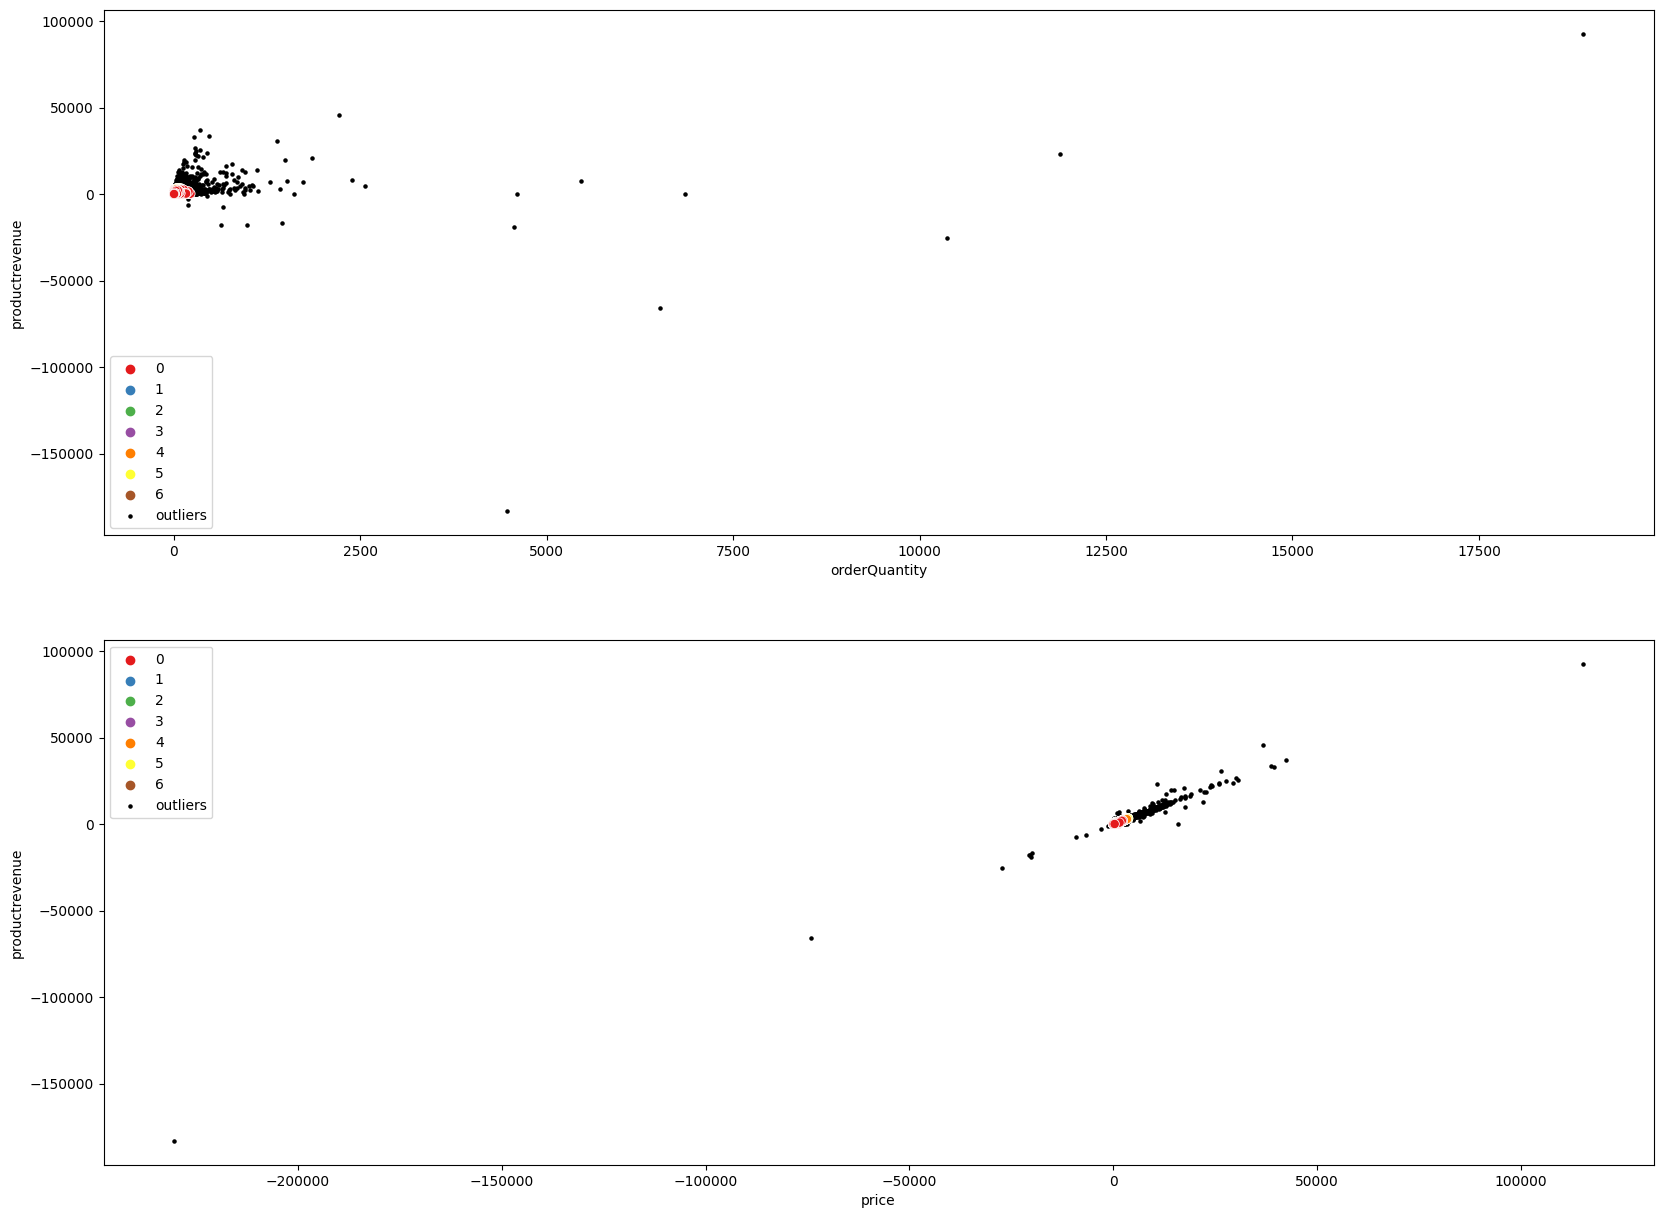

In [99]:
outliers_lott = DBSCAN_clustered_lott[DBSCAN_clustered_lott['Cluster']==-1]

fig2, (axes) = plt.subplots(2,1,figsize=(20,15))
sns.scatterplot(x = 'orderQuantity', y = 'productrevenue', data=DBSCAN_clustered_lott[DBSCAN_clustered_lott['Cluster']!=-1], hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)
plt.ticklabel_format(style='plain')
sns.scatterplot(x = 'price', y = 'productrevenue', data=DBSCAN_clustered_lott[DBSCAN_clustered_lott['Cluster']!=-1], hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)
plt.ticklabel_format(style='plain')

axes[0].scatter(outliers_lott['orderQuantity'], outliers_lott['productrevenue'], s=5, label='outliers', c="k", zorder=-1)
axes[1].scatter(outliers_lott['price'], outliers_lott['productrevenue'], s=5, label='outliers', c="k", zorder=-1)
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

## Hierarchical

### ATU

In [43]:
prod_data_hie = prepare_data_atu.copy()

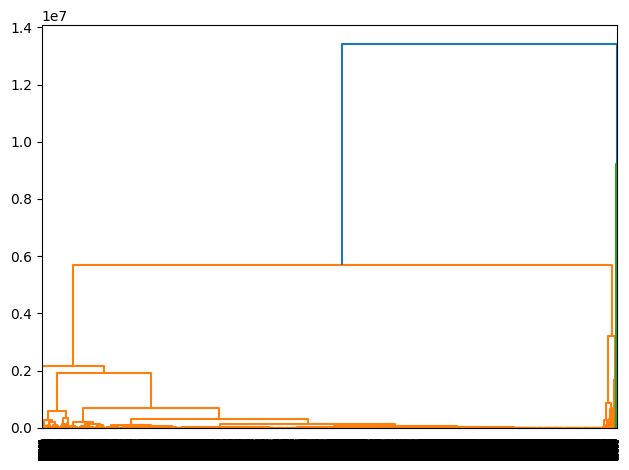

In [44]:
linkage_data = linkage(prod_data_hie, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In [45]:
hierarchical_cluster = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
hier_labels = hierarchical_cluster.fit(prod_data_hie)

pred_agc = pd.Series(hierarchical_cluster.labels_)
prod_data_hie['Class'] = pred_agc; 
hierarcy_labels = pred_agc;

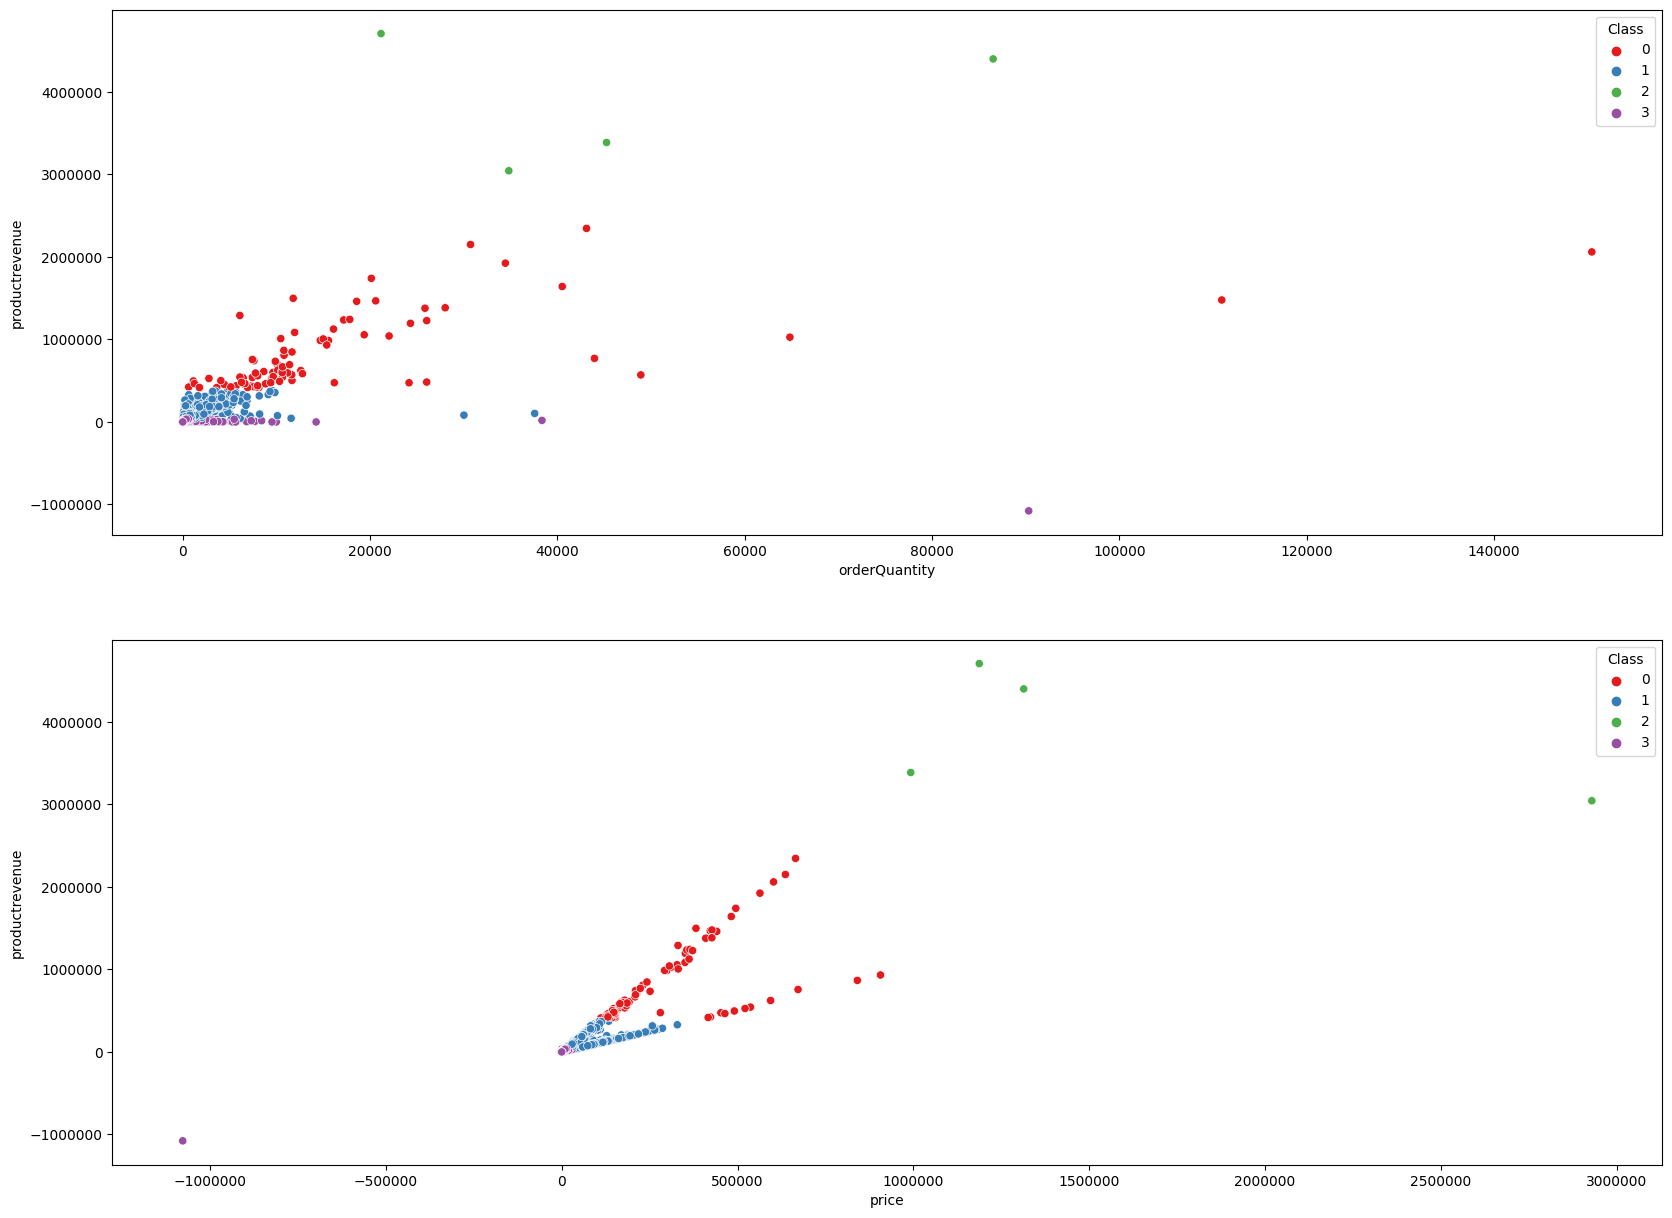

In [46]:
fig3 = plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
sns.scatterplot(x = 'orderQuantity', y = 'productrevenue',hue='Class',data = prod_data_hie,legend='full',palette="Set1")
plt.ticklabel_format(style='plain')
plt.subplot(2,1,2)
sns.scatterplot(x = 'price', y = 'productrevenue',hue='Class', data=prod_data_hie,legend='full',palette="Set1")
plt.ticklabel_format(style='plain')
plt.show()


### LOTT

In [72]:
prod_lott_data_hie = prepare_data_lott.copy()

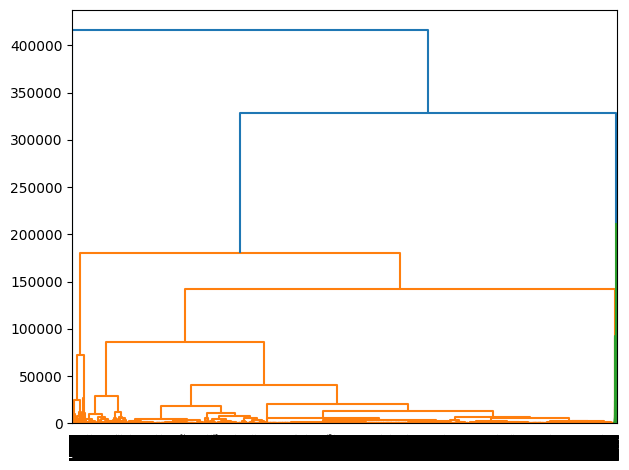

In [73]:
linkage_data_lott = linkage(prod_lott_data_hie, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data_lott)
plt.tight_layout()
plt.show()

In [74]:
hierarchical_cluster_lott = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'ward')
hier_lott_labels = hierarchical_cluster_lott.fit(prod_lott_data_hie)

In [78]:
pred_agc_lott = pd.Series(hierarchical_cluster_lott.labels_)
prod_lott_data_hie['Class'] = pred_agc_lott; 
hierarcy_lott_labels = pred_agc_lott;

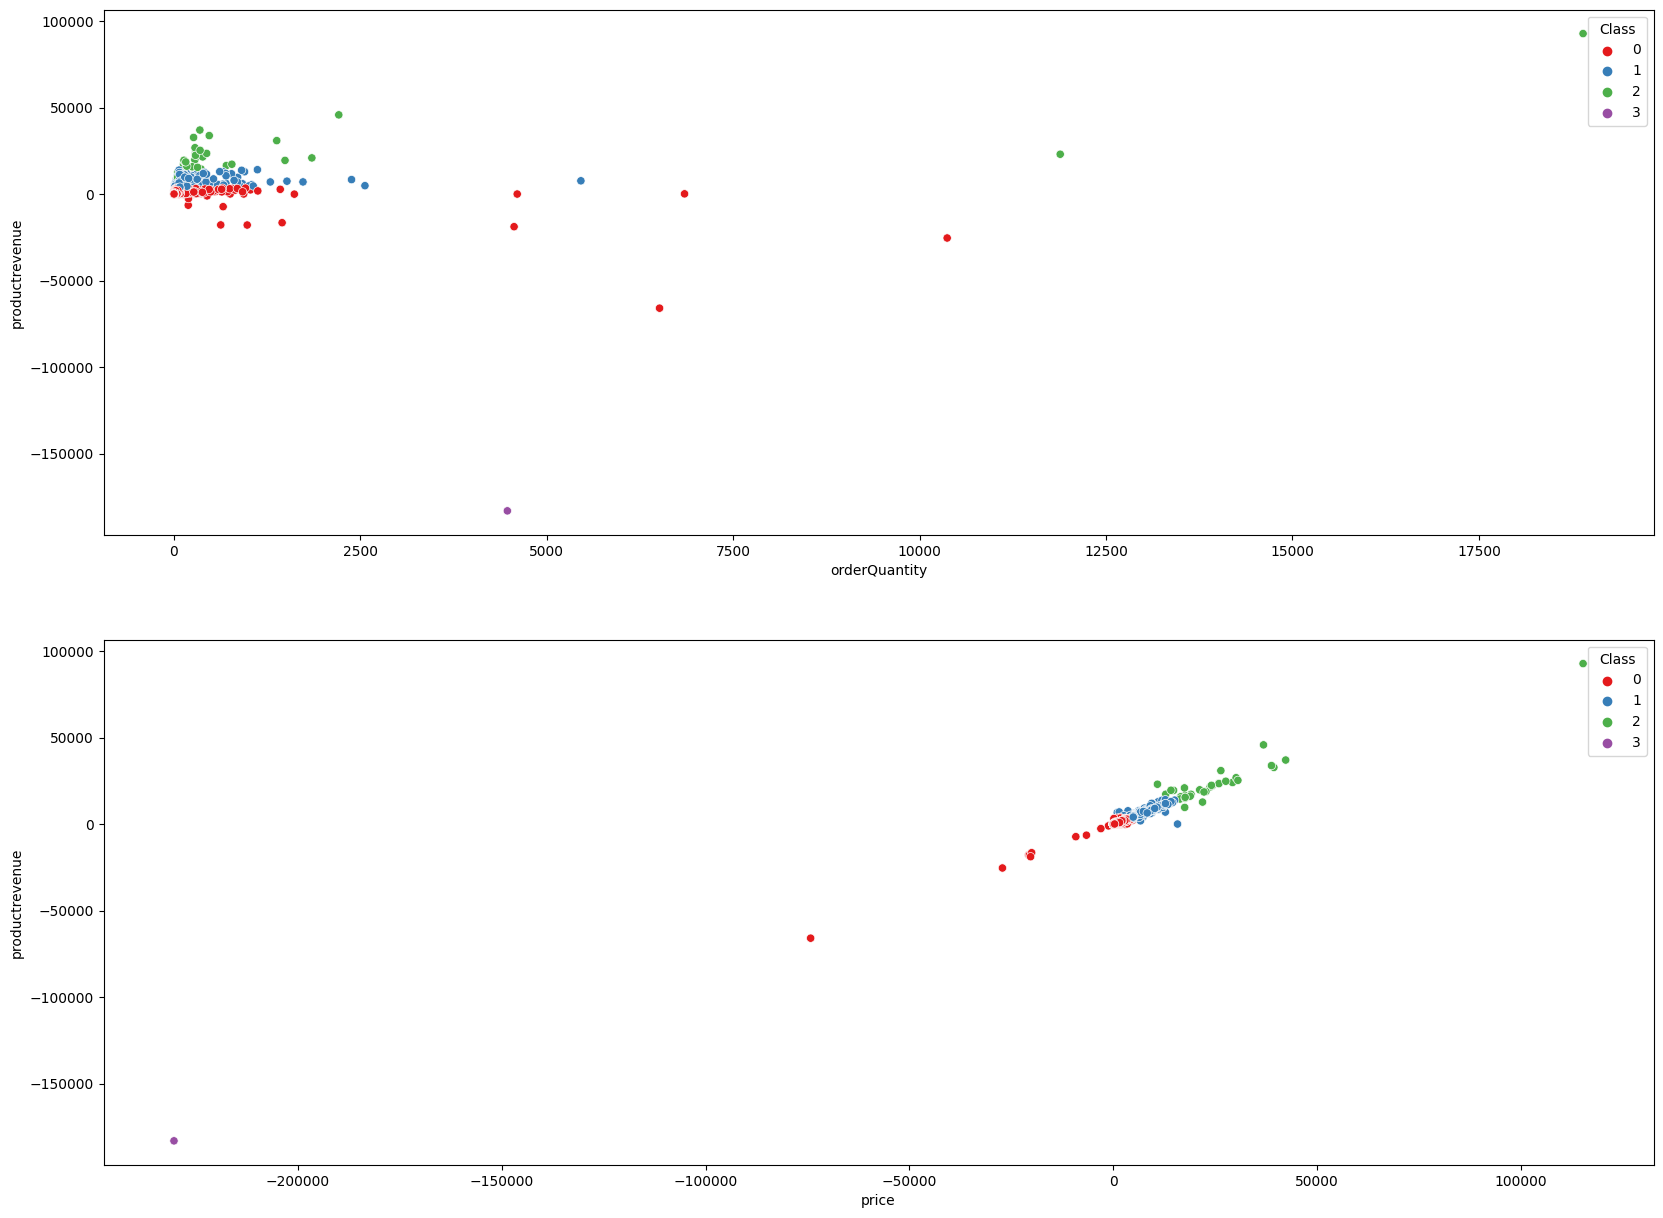

In [79]:
fig3 = plt.figure(figsize = (20,15))
plt.subplot(2,1,1)
sns.scatterplot(x = 'orderQuantity', y = 'productrevenue',hue='Class',data = prod_lott_data_hie,legend='full',palette="Set1")
plt.ticklabel_format(style='plain')
plt.subplot(2,1,2)
sns.scatterplot(x = 'price', y = 'productrevenue',hue='Class', data=prod_lott_data_hie,legend='full',palette="Set1")
plt.ticklabel_format(style='plain')
plt.show()


# Evaluation 

# ATU

## Silhoutte Score

In [ ]:
kmeans_silhouette = metrics.silhouette_score(prod_data_kmeans, kmeans_pred, metric='euclidean')
dbscan_silhouette = metrics.silhouette_score(prod_data_dbscan, dbscan_labels, metric='euclidean')
hierarchical_silhouette = metrics.silhouette_score(prod_data_hie, hierarcy_labels, metric='euclidean')

## Calinski Harabasz Score

In [ ]:
kmeans_ch = metrics.calinski_harabasz_score(prod_data_kmeans, kmeans_pred)
dbscan_ch = metrics.calinski_harabasz_score(prod_data_dbscan, dbscan_labels)
hierarchical_ch = metrics.calinski_harabasz_score(prod_data_hie, hierarcy_labels)

## Davies Bouldin Index

In [ ]:
kmeans_db = metrics.davies_bouldin_score(prod_data_kmeans, kmeans_pred)
dbscan_db = metrics.davies_bouldin_score(prod_data_dbscan, dbscan_labels)
hierarchical_db = metrics.davies_bouldin_score(prod_data_hie, hierarcy_labels)

In [51]:
data = [
    ['KMeans',kmeans_silhouette, kmeans_ch, kmeans_db], 
    ['DBSCAN', dbscan_silhouette, dbscan_ch, dbscan_db],
    ['Hierarchical', hierarchical_silhouette, hierarchical_ch, hierarchical_db]
       ]

result = pd.DataFrame(data, columns=['Model', 'Silhouette_Score', 'Calinski_Harabasz_Score', 'Davies_Bouldin_Index'])

result

,Model,Silhouette_Score,Calinski_Harabasz_Score,Davies_Bouldin_Index
0,KMeans,0.968677,120218.148907,0.483887
1,DBSCAN,0.650642,1134.641281,1.274906
2,Hierarchical,0.938903,98597.016311,0.547720


# LOTT

## Silhoutte Score

In [103]:
kmeans_silhouette_lott = metrics.silhouette_score(prod_lott_data_kmeans, kmeans_lott_pred, metric='euclidean')
dbscan_silhouette_lott = metrics.silhouette_score(prod_lott_data_dbscan, dbscan_labels_lott, metric='euclidean')
hierarchical_silhouette_lott = metrics.silhouette_score(prod_lott_data_hie, hierarcy_lott_labels, metric='euclidean')

## CH Score

In [104]:
kmeans_ch_lott = metrics.calinski_harabasz_score(prod_lott_data_kmeans, kmeans_lott_pred)
dbscan_ch_lott = metrics.calinski_harabasz_score(prod_lott_data_dbscan, dbscan_labels_lott)
hierarchical_ch_lott = metrics.calinski_harabasz_score(prod_lott_data_hie, hierarcy_lott_labels)

## DB Index

In [105]:
kmeans_db_lott = metrics.davies_bouldin_score(prod_lott_data_kmeans, kmeans_lott_pred)
dbscan_db_lott = metrics.davies_bouldin_score(prod_lott_data_dbscan, dbscan_labels_lott)
hierarchical_db_lott = metrics.davies_bouldin_score(prod_lott_data_hie, hierarcy_lott_labels)

In [85]:
data = [
    ['KMeans',kmeans_silhouette_lott, kmeans_ch_lott, kmeans_db_lott], 
    ['DBSCAN', dbscan_silhouette_lott, dbscan_ch_lott, dbscan_db_lott],
    ['Hierarchical', hierarchical_silhouette_lott, hierarchical_ch_lott, hierarchical_db_lott]
       ]

result = pd.DataFrame(data, columns=['Model', 'Silhouette_Score', 'Calinski_Harabasz_Score', 'Davies_Bouldin_Index'])

result

,Model,Silhouette_Score,Calinski_Harabasz_Score,Davies_Bouldin_Index
0,KMeans,0.950407,151355.874368,0.379687
1,DBSCAN,0.750106,4455.591255,5.549351
2,Hierarchical,0.963901,139397.783382,0.398801


In [106]:
data = [
    ['KMeans',kmeans_silhouette_lott, kmeans_ch_lott, kmeans_db_lott], 
    ['DBSCAN', dbscan_silhouette_lott, dbscan_ch_lott, dbscan_db_lott],
    ['Hierarchical', hierarchical_silhouette_lott, hierarchical_ch_lott, hierarchical_db_lott]
       ]

result = pd.DataFrame(data, columns=['Model', 'Silhouette_Score', 'Calinski_Harabasz_Score', 'Davies_Bouldin_Index'])

result

,Model,Silhouette_Score,Calinski_Harabasz_Score,Davies_Bouldin_Index
0,KMeans,0.935198,181185.092040,0.283321
1,DBSCAN,0.750106,4455.591255,5.549351
2,Hierarchical,0.963901,139397.783382,0.398801
